# Medical Question Answering Chatbot 🤖💊

Welcome to the development of an intelligent Medical Question Answering Chatbot! This project combines the power of Natural Language Processing (NLP), deep learning, and medical knowledge to create a tool capable of addressing a wide range of health-related questions. From understanding symptoms and suggesting potential causes to explaining treatments and medical terminologies, this chatbot is designed to make healthcare information more accessible, accurate, and user-friendly. 🌟

In an era where quick access to reliable medical information is essential, this chatbot aims to bridge the gap between complex medical data and everyday users. By leveraging advanced NLP models and medical-specific datasets, the chatbot not only understands user queries but also provides meaningful, empathetic, and context-aware responses. 🚀


# Import Libraries

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split

# Loading datasets
To create a highly effective Medical Question Answering Chatbot, the dataset consisting of medical questions and answers will undergo a thorough preprocessing pipeline before being fed into the model for training. Below is an overview of the preprocessing steps and how the prepared data will be utilized for model training:


1. **Dataset Preprocessing**
The raw dataset often contains noise and inconsistencies that need to be addressed. The preprocessing pipeline will involve the following steps:


2. **Splitting the Data**
- **Training Set**: 85% of the dataset will be used to train the model.
- **Validation Set**: 15% of the dataset will be used to validation process

3. **Model Input Preparation**

4. **Model Training**
The preprocessed data will be fed into a deep learning model (Transformer),


In [ ]:
medquad = pd.read_csv('/content/drive/MyDrive/medquad.csv')
medquad

,question,answer,source,focus_area
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma
1,What causes Glaucoma ?,"Nearly 2.7 million people have glaucoma, a lea...",NIHSeniorHealth,Glaucoma
2,What are the symptoms of Glaucoma ?,Symptoms of Glaucoma Glaucoma can develop in ...,NIHSeniorHealth,Glaucoma
3,What are the treatments for Glaucoma ?,"Although open-angle glaucoma cannot be cured, ...",NIHSeniorHealth,Glaucoma
4,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma
...,...,...,...,...
16407,What is (are) Diabetic Neuropathies: The Nerve...,Focal neuropathy appears suddenly and affects ...,NIDDK,Diabetic Neuropathies: The Nerve Damage of Dia...
16408,How to prevent Diabetic Neuropathies: The Nerv...,The best way to prevent neuropathy is to keep ...,NIDDK,Diabetic Neuropathies: The Nerve Damage of Dia...
16409,How to diagnose Diabetic Neuropathies: The Ner...,Doctors diagnose neuropathy on the basis of sy...,NIDDK,Diabetic Neuropathies: The Nerve Damage of Dia...
16410,What are the treatments for Diabetic Neuropath...,The first treatment step is to bring blood glu...,NIDDK,Diabetic Neuropathies: The Nerve Damage of Dia...


In [ ]:
medquad['question'][0]

'What is (are) Glaucoma ?'

In [ ]:
medquad['answer'][0]

"Glaucoma is a group of diseases that can damage the eye's optic nerve and result in vision loss and blindness. While glaucoma can strike anyone, the risk is much greater for people over 60. How Glaucoma Develops  There are several different types of glaucoma. Most of these involve the drainage system within the eye. At the front of the eye there is a small space called the anterior chamber. A clear fluid flows through this chamber and bathes and nourishes the nearby tissues. (Watch the video to learn more about glaucoma. To enlarge the video, click the brackets in the lower right-hand corner. To reduce the video, press the Escape (Esc) button on your keyboard.) In glaucoma, for still unknown reasons, the fluid drains too slowly out of the eye. As the fluid builds up, the pressure inside the eye rises. Unless this pressure is controlled, it may cause damage to the optic nerve and other parts of the eye and result in loss of vision. Open-angle Glaucoma The most common type of glaucoma i

In [ ]:
medquad.shape

(16412, 4)

In [ ]:
path = kagglehub.dataset_download("gvaldenebro/cancer-q-and-a-dataset")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/gvaldenebro/cancer-q-and-a-dataset/versions/4


In [ ]:
cancer = pd.read_csv(path+'/CancerQA.csv')
diabetes = pd.read_csv(path+'/Diabetes_and_Digestive_and_Kidney_DiseasesQA.csv')
disease = pd.read_csv(path+'/Disease_Control_and_PreventionQA.csv')
gen = pd.read_csv(path+'/Genetic_and_Rare_DiseasesQA.csv')
heart = pd.read_csv(path+'/Heart_Lung_and_BloodQA.csv')
med = pd.read_csv(path+'/MedicalQuestionAnswering.csv')
neuro = pd.read_csv(path+'/Neurological_Disorders_and_StrokeQA.csv')
other = pd.read_csv(path+'/OtherQA.csv')
senior = pd.read_csv(path+'/SeniorHealthQA.csv')
growth = pd.read_csv(path+'/growth_hormone_receptorQA.csv')

In [ ]:
cancer

,Question,Answer,topic,split
0,What is (are) Non-Small Cell Lung Cancer ?,Key Points\n - Non-small ce...,cancer,train
1,Who is at risk for Non-Small Cell Lung Cancer? ?,Smoking is the major risk factor for non-small...,cancer,train
2,What are the symptoms of Non-Small Cell Lung C...,Signs of non-small cell lung cancer include a ...,cancer,test
3,How to diagnose Non-Small Cell Lung Cancer ?,Tests that examine the lungs are used to detec...,cancer,train
4,What is the outlook for Non-Small Cell Lung Ca...,Certain factors affect prognosis (chance of re...,cancer,train
...,...,...,...,...
724,How to diagnose Adult Soft Tissue Sarcoma ?,Adult soft tissue sarcoma is diagnosed with a ...,cancer,test
725,What is the outlook for Adult Soft Tissue Sarc...,Certain factors affect treatment options and p...,cancer,test
726,What are the stages of Adult Soft Tissue Sarco...,Key Points\n - After adult ...,cancer,train
727,what research (or clinical trials) is being do...,Patients may want to think about taking part i...,cancer,train


In [ ]:
senior

,Question,Answer,topic,split
0,What is (are) Gum (Periodontal) Disease ?,An Infection of the Gums and Surrounding Tissu...,SeniorHealth,train
1,How to prevent Gum (Periodontal) Disease ?,Risk Factors There are a number of risk factor...,SeniorHealth,train
2,What are the symptoms of Gum (Periodontal) Dis...,Symptoms Symptoms of gum disease may include: ...,SeniorHealth,test
3,What are the treatments for Gum (Periodontal) ...,Controlling the Infection The main goal of tre...,SeniorHealth,train
4,What is (are) Gum (Periodontal) Disease ?,Gum disease is an infection of the tissues tha...,SeniorHealth,train
...,...,...,...,...
764,What is (are) Dry Mouth ?,Sjgren's Syndrome Clinic National Institute o...,SeniorHealth,test
765,What is (are) Dry Mouth ?,For information about the clinical trial on th...,SeniorHealth,test
766,What are the treatments for Dry Mouth ?,Dry mouth treatment will depend on what is cau...,SeniorHealth,train
767,What is (are) Dry Mouth ?,You should avoid sticky and sugary foods. If y...,SeniorHealth,train


### Concat Dataframes

In [ ]:
df = pd.concat([medquad.drop(['source', 'focus_area'], axis = 1).rename({'question': 'Question', 'answer': 'Answer'}, axis = 1),
                cancer.drop(['topic', 'split'], axis = 1),
                diabetes.drop(['topic', 'split'], axis = 1),
                disease.drop(['topic', 'split'], axis = 1),
                gen.drop(['topic', 'split'], axis = 1),
                heart.drop(['topic', 'split'], axis = 1),
                med.drop(['topic', 'split'], axis = 1),
                neuro.drop(['topic', 'split'], axis = 1),
                other.drop(['topic', 'split'], axis = 1),
                senior.drop(['topic', 'split'], axis = 1),
                growth.drop(['topic', 'split'], axis = 1)], ignore_index=True)

In [ ]:
df

,Question,Answer
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...
1,What causes Glaucoma ?,"Nearly 2.7 million people have glaucoma, a lea..."
2,What are the symptoms of Glaucoma ?,Symptoms of Glaucoma Glaucoma can develop in ...
3,What are the treatments for Glaucoma ?,"Although open-angle glaucoma cannot be cured, ..."
4,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...
...,...,...
49219,What is (are) laryngo-onycho-cutaneous syndrome ?,Laryngo-onycho-cutaneous (LOC) syndrome is a d...
49220,How many people are affected by laryngo-onycho...,LOC syndrome is a rare disorder that primarily...
49221,What are the genetic changes related to laryng...,LOC syndrome is caused by mutations in the LAM...
49222,Is laryngo-onycho-cutaneous syndrome inherited ?,This condition is inherited in an autosomal re...


In [ ]:
df.shape

(49224, 2)

# Data Preprocessing

### Drop dupicated values

In [ ]:
df.duplicated().sum()

32858

In [ ]:
df.drop_duplicates(inplace=True)
df

,Question,Answer
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...
1,What causes Glaucoma ?,"Nearly 2.7 million people have glaucoma, a lea..."
2,What are the symptoms of Glaucoma ?,Symptoms of Glaucoma Glaucoma can develop in ...
3,What are the treatments for Glaucoma ?,"Although open-angle glaucoma cannot be cured, ..."
4,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...
...,...,...
16409,How to diagnose Diabetic Neuropathies: The Ner...,Doctors diagnose neuropathy on the basis of sy...
16410,What are the treatments for Diabetic Neuropath...,The first treatment step is to bring blood glu...
16411,What to do for Diabetic Neuropathies: The Nerv...,- Diabetic neuropathies are nerve disorders ca...
18470,How to prevent La Crosse Encephalitis ?,There is no vaccine against La Crosse encephal...


انا لسه مكتشف ان تقريبا الداتا التانية متاخدة من الداتا الاولى ف مش مشكلة وهسيبها زى ما هى كدا عشان حرام الشغل اللى عملته 😂️

In [ ]:
df.duplicated().sum()

0

### Drop missing values

In [ ]:
df.isna().sum()

,0
Question,0
Answer,5


In [ ]:
df.dropna(inplace=True)
df.isna().sum()

,0
Question,0
Answer,0


In [ ]:
df.shape

(16361, 2)

### Cleaner

In [ ]:
def cleaner(text):
  text = text.lower()
  text = re.sub(r'\W', ' ', text)
  text = text.strip()
  return text

In [ ]:
X = df['Question'].apply(cleaner)
y = df['Answer'].apply(cleaner)

### Data Spliting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.2)

### Toknization

In [ ]:
tokn_questions = Tokenizer()
tokn_answers = Tokenizer()

In [ ]:
tokn_questions.fit_on_texts(X_train)
X_train_ques_seq = tokn_questions.texts_to_sequences(X_train)
X_test_ques_seq = tokn_questions.texts_to_sequences(X_test)
X_val_ques_seq = tokn_questions.texts_to_sequences(X_val)

In [ ]:
tokn_answers.fit_on_texts(y_train)
y_train_ans_seq = tokn_answers.texts_to_sequences(y_train)
y_test_ans_seq = tokn_answers.texts_to_sequences(y_test)
y_val_ans_seq = tokn_answers.texts_to_sequences(y_val)

In [ ]:
max_ques_len = max([len(seq) for seq in X_train_ques_seq+X_test_ques_seq+X_val_ques_seq])
max_ans_len = max([len(seq) for seq in y_train_ans_seq+y_test_ans_seq+y_val_ans_seq])

In [ ]:
print(f'max ques len: {max_ques_len}')
print(f'max ans len: {max_ans_len}')

max ques len: 26
max ans len: 4251


### Seq Padding

In [ ]:
train_ques_pad = pad_sequences(X_train_ques_seq, maxlen= max_ques_len, padding='post')
test_ques_pad = pad_sequences(X_test_ques_seq, maxlen= max_ques_len, padding='post')
val_ques_pad = pad_sequences(X_val_ques_seq, maxlen= max_ques_len, padding='post')

In [ ]:
train_ans_pad = pad_sequences(y_train_ans_seq, maxlen= max_ans_len, padding='post')
test_ans_pad = pad_sequences(y_test_ans_seq, maxlen= max_ans_len, padding='post')
val_ans_pad = pad_sequences(y_val_ans_seq, maxlen= max_ans_len, padding='post')

In [ ]:
questions_voc_size = len(tokn_questions.word_index)+1
questions_voc_size

4111

# Positional Encoding

In [ ]:
class PositionalEncoding(layers.Layer):
  def __init__(self, maxlen, embed_dim):
    super(PositionalEncoding, self).__init__()
    self.maxlen = maxlen
    self.embed_dim = embed_dim

  def build(self, input_shape):
    position = np.arange(self.maxlen)[:, np.newaxis]
    div_term = np.exp(np.arange(0, self.embed_dim, 2) * (-np.log(10000.0) / self.embed_dim))
    pe = np.zeros((1, self.maxlen, self.embed_dim))
    pe[0, :, 0::2] = np.sin(position * div_term)
    pe[0, :, 1::2] = np.cos(position * div_term)
    self.pe = tf.constant(pe, dtype=tf.float32)
    super(PositionalEncoding, self).build(input_shape)

  def call(self, x):
    x = x + self.pe
    return x

# Transformer Block

In [ ]:
class Transformer(layers.Layer):
  def __init__(self, embed_dim, num_heads, ff_dim, rate):
    super(Transformer, self).__init__()
    self.att = layers.MultiHeadAttention(num_heads, key_dim=embed_dim)
    self.ffn = tf.keras.Sequential([
        layers.Dense(ff_dim, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        layers.Dense(ff_dim//2, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        layers.Dense(ff_dim//4, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        layers.Dense(ff_dim//8, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        layers.Dropout(0.5),
        layers.Dense(ff_dim, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        layers.Dense(ff_dim//2, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        layers.Dense(ff_dim//4, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        layers.Dense(ff_dim//8, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        layers.Dense(embed_dim, kernel_regularizer=tf.keras.regularizers.l2(0.001))
    ])
    self.norm = layers.LayerNormalization()
    self.drop = layers.Dropout(rate)

  def call(self, inputs, *args, **kwargs):
    training = kwargs.get('training', False)
    att_output = self.att(inputs, inputs)
    att_output = self.drop(att_output, training = training)
    output = self.norm(inputs + att_output)
    ffn_output = self.ffn(output)
    ffn_output = self.drop(ffn_output, training = training)
    return self.norm(ffn_output + output)

# Model Building

In [ ]:
maxlength = max_ques_len
embed_dim = 1024
num_heads = 64
ff_dim = 1024

In [ ]:
inputs = layers.Input(shape = (maxlength, ), dtype=tf.float32)
embedding = layers.Embedding(input_dim = maxlength, output_dim=embed_dim)(inputs)
pos_encoding = PositionalEncoding(maxlength, embed_dim)(embedding)
trasformer_block = Transformer(embed_dim, num_heads, ff_dim, 0.2)(pos_encoding) # tune
gap = layers.GlobalAveragePooling1D()(trasformer_block)
outputs = layers.Dense(max_ans_len, activation='softmax')(gap)
model = models.Model(inputs, outputs)

In [ ]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.CategoricalCrossentropy,
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 26)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 26, 1024)            │          26,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ positional_encoding                  │ (None, 26, 1024)            │               0 │
│ (PositionalEncoding)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer (Transformer)            │ (None, 26, 1024)            │     271,326,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 1024)                │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4251)                │       4,357,275 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 275,710,875 (1.03 GB)

 Trainable params: 275,710,875 (1.03 GB)

 Non-trainable params: 0 (0.00 B)

# Model Traing

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=20,
                                                  restore_best_weights=True)

In [ ]:
history = model.fit(train_ques_pad,
                    train_ans_pad,
                    epochs = 200,
                    batch_size = 32,
                    validation_data = (val_ques_pad, val_ans_pad),
                    callbacks = [early_stopping])

Epoch 1/200
328/328 ━━━━━━━━━━━━━━━━━━━━ 188s 505ms/step - accuracy: 0.0202 - loss: 4735927.5000 - val_accuracy: 0.0328 - val_loss: 25109060.0000
Epoch 2/200
328/328 ━━━━━━━━━━━━━━━━━━━━ 168s 453ms/step - accuracy: 0.0307 - loss: 38334728.0000 - val_accuracy: 0.0328 - val_loss: 83919264.0000
Epoch 3/200
328/328 ━━━━━━━━━━━━━━━━━━━━ 202s 452ms/step - accuracy: 0.0321 - loss: 110426872.0000 - val_accuracy: 0.0470 - val_loss: 175653984.0000
Epoch 4/200
328/328 ━━━━━━━━━━━━━━━━━━━━ 212s 483ms/step - accuracy: 0.0329 - loss: 208971440.0000 - val_accuracy: 0.0470 - val_loss: 299307200.0000
Epoch 5/200
328/328 ━━━━━━━━━━━━━━━━━━━━ 202s 482ms/step - accuracy: 0.0346 - loss: 347410912.0000 - val_accuracy: 0.0470 - val_loss: 447563328.0000
Epoch 6/200
328/328 ━━━━━━━━━━━━━━━━━━━━ 158s 481ms/step - accuracy: 0.0331 - loss: 502880960.0000 - val_accuracy: 0.0470 - val_loss: 623005952.0000
Epoch 7/200
328/328 ━━━━━━━━━━━━━━━━━━━━ 192s 451ms/step - accuracy: 0.0381 - loss: 679104384.0000 - val_accura

# Evaluation

In [ ]:
def model_training_history_graph(hist):
  plt.figure(figsize = (10, 5))
  plt.subplot(1, 2, 1)
  plt.plot(hist.history['accuracy'], label = 'accuracy')
  plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
  plt.title('Training Accuracy Graph')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.tight_layout()

  plt.subplot(1, 2, 2)
  plt.plot(hist.history['loss'], label = 'loss')
  plt.plot(hist.history['val_loss'], label = 'val_loss')
  plt.title('Training Loss Graph')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.tight_layout()

  plt.show()

# Exp.2 With Start and End Char

In [ ]:
X = df['Question'].apply(cleaner)
y = df['Answer'].apply(cleaner)

In [ ]:
y = '<start>' + y.astype(str) + '<end>'

In [ ]:
y[100]

'<start>most insurance plans  including health maintenance organizations  hmos   will cover treatment for anxiety disorders  check with your insurance company and find out  if you dont have insurance  the health and human services division of your county government may offer mental health care at a public mental health center that charges people according to how much they are able to pay  if you are on public assistance  you may be able to get care through your state medicaid plan  to learn about more mental health resources  see  help for mental illness   from the national institute of mental health at nih<end>'

### Tokenization

In [ ]:
default_filters = '!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n'
custom_filters = default_filters.replace('<', '').replace('>', '')

ans_tokn_custom = Tokenizer(filters = custom_filters)
quest_tokn = Tokenizer()

In [ ]:
quest_tokn.fit_on_texts(X)
ans_tokn_custom.fit_on_texts(y)

In [ ]:
question_tokns = quest_tokn.texts_to_sequences(X)
ans_tokns = ans_tokn_custom.texts_to_sequences(y)

### Data spliting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(question_tokns, ans_tokns, random_state=42, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.2)

### Padding

In [ ]:
max_ques_len = max([len(seq) for seq in X_train+X_test+X_val])
max_ans_len = max([len(seq) for seq in y_train+y_test+y_val])

In [ ]:
print(f'max ques len: {max_ques_len}')
print(f'max ans len: {max_ans_len}')

max ques len: 26
max ans len: 4251


In [ ]:
train_ques_pad = pad_sequences(X_train, maxlen= max_ques_len, padding='post')
test_ques_pad = pad_sequences(X_test, maxlen= max_ques_len, padding='post')
val_ques_pad = pad_sequences(X_val, maxlen= max_ques_len, padding='post')

In [ ]:
train_ans_pad = pad_sequences(y_train, maxlen= max_ans_len, padding='post')
test_ans_pad = pad_sequences(y_test, maxlen= max_ans_len, padding='post')
val_ans_pad = pad_sequences(y_val, maxlen= max_ans_len, padding='post')

In [ ]:
questions_voc_size = len(tokn_questions.word_index)+1
questions_voc_size

4111

### Model building

In [ ]:
maxlength = max_ques_len
embed_dim = 1024
num_heads = 64
ff_dim = 1024

In [ ]:
inputs = layers.Input(shape = (maxlength, ), dtype=tf.float32)
embedding = layers.Embedding(input_dim = maxlength, output_dim=embed_dim)(inputs)
pos_encoding = PositionalEncoding(maxlength, embed_dim)(embedding)
trasformer_block = Transformer(embed_dim, num_heads, ff_dim, 0.0)(pos_encoding) # tune
gap = layers.GlobalAveragePooling1D()(trasformer_block)
outputs = layers.Dense(max_ans_len, activation='softmax')(gap)
model_v2 = models.Model(inputs, outputs)

In [ ]:
model_v2.compile(optimizer='adam',
              loss = tf.keras.losses.CategoricalCrossentropy,
              metrics = ['accuracy'])

In [ ]:
model_v2.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 26)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 26, 1024)            │          26,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ positional_encoding_1                │ (None, 26, 1024)            │               0 │
│ (PositionalEncoding)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_1 (Transformer)          │ (None, 26, 1024)            │     271,326,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 4251)                │       4,357,275 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 275,710,875 (1.03 GB)

 Trainable params: 275,710,875 (1.03 GB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model_v2.fit(train_ques_pad,
                    train_ans_pad,
                    epochs = 100,
                    batch_size = 128,
                    validation_data = (val_ques_pad, val_ans_pad),
                    callbacks = [early_stopping])

Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.1766 - loss: 1681010.0000 - val_accuracy: 0.1803 - val_loss: 3071804.7500
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.1867 - loss: 4019839.7500 - val_accuracy: 0.1803 - val_loss: 6787408.5000
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.1879 - loss: 7720832.5000 - val_accuracy: 0.1803 - val_loss: 11981336.0000
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.1814 - loss: 12670500.0000 - val_accuracy: 0.1803 - val_loss: 18854964.0000
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.1786 - loss: 19269112.0000 - val_accuracy: 0.1803 - val_loss: 27060620.0000
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.1836 - loss: 28847546.0000 - val_accuracy: 0.1803 - val_loss: 37080556.0000
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.1833 - loss: 38081412.0000 - val_accuracy: 0.1803 - val_loss: 48370064.0000
Epoch 8/100

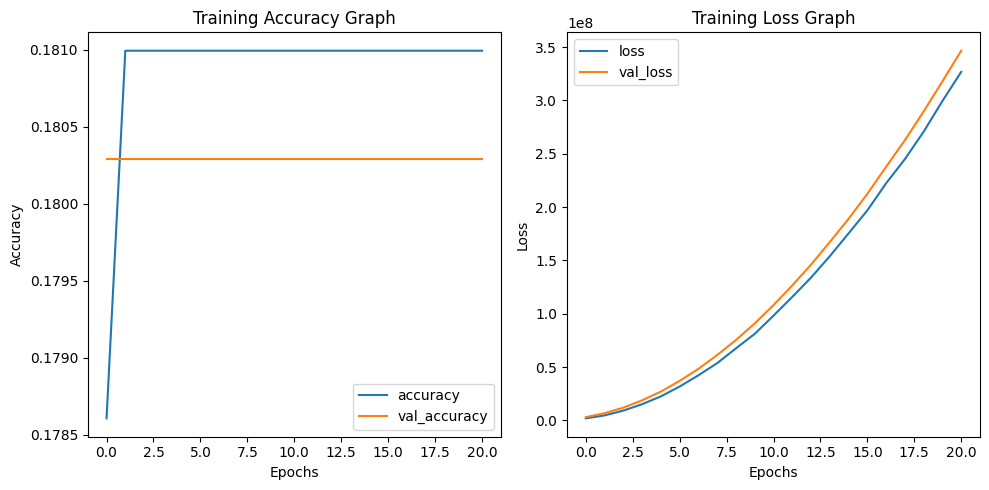

In [ ]:
model_training_history_graph(history)

# Exp.3

In [ ]:
maxlength = max_ques_len
embed_dim = 512
num_heads = 56
ff_dim = 512

In [ ]:
inputs = layers.Input(shape = (maxlength, ), dtype=tf.float32)
embedding = layers.Embedding(input_dim = maxlength, output_dim=embed_dim)(inputs)
pos_encoding = PositionalEncoding(maxlength, embed_dim)(embedding)
trasformer_block = Transformer(embed_dim, num_heads, ff_dim, 0.1)(pos_encoding) # tune
gap = layers.GlobalAveragePooling1D()(trasformer_block)
outputs = layers.Dense(max_ans_len, activation='softmax')(gap)
model_v3 = models.Model(inputs, outputs)

In [ ]:
model_v3.compile(optimizer='adam',
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy'])

In [ ]:
model_v3.summary()

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)          │ (None, 26)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_9 (Embedding)              │ (None, 26, 512)             │          13,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ positional_encoding_9                │ (None, 26, 512)             │               0 │
│ (PositionalEncoding)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_9 (Transformer)          │ (None, 26, 512)             │      59,481,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_8           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_99 (Dense)                     │ (None, 4251)                │       2,180,763 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,676,059 (235.28 MB)

 Trainable params: 61,676,059 (235.28 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                                  patience=5,
                                                  restore_best_weights=True)

In [ ]:
history = model_v3.fit(train_ques_pad,
                    train_ans_pad,
                    epochs = 50,
                    batch_size = 128,
                    validation_data = (val_ques_pad, val_ans_pad),
                    callbacks = [early_stopping])

Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 54s 558ms/step - accuracy: 0.1704 - loss: 1389876.7500 - val_accuracy: 0.1803 - val_loss: 1917355.3750
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 62s 370ms/step - accuracy: 0.1779 - loss: 2335496.0000 - val_accuracy: 0.1803 - val_loss: 3741039.2500
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 31s 374ms/step - accuracy: 0.1845 - loss: 4348382.0000 - val_accuracy: 0.1803 - val_loss: 6433427.0000
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 41s 379ms/step - accuracy: 0.1826 - loss: 6988723.5000 - val_accuracy: 0.1803 - val_loss: 9973354.0000
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 42s 391ms/step - accuracy: 0.1818 - loss: 11112264.0000 - val_accuracy: 0.1803 - val_loss: 13999803.0000
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 40s 385ms/step - accuracy: 0.1743 - loss: 15787835.0000 - val_accuracy: 0.1803 - val_loss: 19073150.0000
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 34s 421ms/step - accuracy: 0.1790 - loss: 20207540.0000 - val_accuracy: 0.1803 - val_loss: 25035990.0000


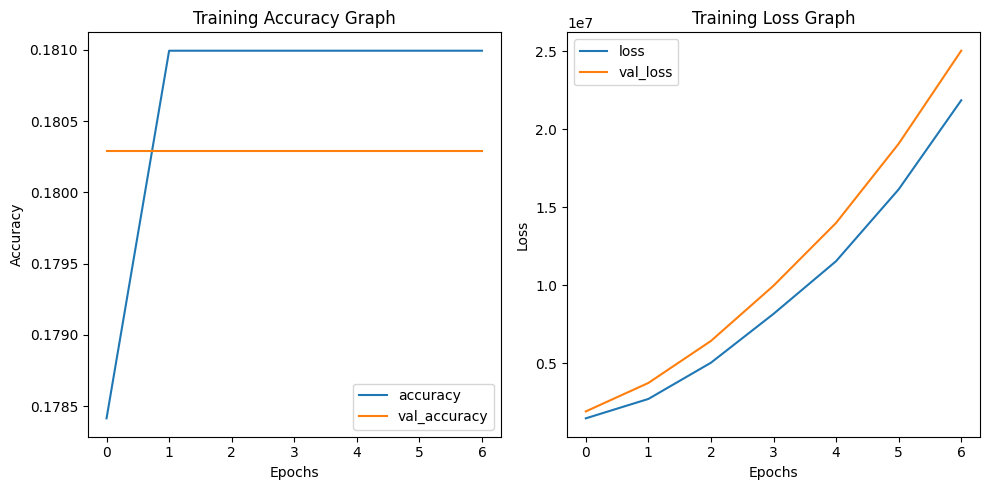

In [ ]:
model_training_history_graph(history)

In [ ]:
model_v3.save('model_v3.keras')

# Exp.4 Remove Stopwords

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def cleaner_2(text):
  text = text.lower()
  text = re.sub(r'\W', ' ', text)
  text = text.strip()
  filtered_sentence = [w for w in text.split() if not w.lower() in stop_words]
  text = ' '.join(filtered_sentence)
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
X = df['Question'].apply(cleaner_2)
y = df['Answer'].apply(cleaner)

In [ ]:
X[100]

'treatments anxiety disorders'

In [ ]:
y[100]

'most insurance plans  including health maintenance organizations  hmos   will cover treatment for anxiety disorders  check with your insurance company and find out  if you dont have insurance  the health and human services division of your county government may offer mental health care at a public mental health center that charges people according to how much they are able to pay  if you are on public assistance  you may be able to get care through your state medicaid plan  to learn about more mental health resources  see  help for mental illness   from the national institute of mental health at nih'

In [ ]:
y = '<start>' + y.astype(str) + '<end>'

In [ ]:
default_filters = '!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n'
custom_filters = default_filters.replace('<', '').replace('>', '')

ans_tokn_custom = Tokenizer(filters = custom_filters)
quest_tokn = Tokenizer()

quest_tokn.fit_on_texts(X)
ans_tokn_custom.fit_on_texts(y)

In [ ]:
question_tokns = quest_tokn.texts_to_sequences(X)
ans_tokns = ans_tokn_custom.texts_to_sequences(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(question_tokns, ans_tokns, random_state=42, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.2)

In [ ]:
max_ques_len = max([len(seq) for seq in X_train+X_test+X_val])
max_ans_len = max([len(seq) for seq in y_train+y_test+y_val])

In [ ]:
print(f'max ques len: {max_ques_len}')
print(f'max ans len: {max_ans_len}')

max ques len: 18
max ans len: 4251


In [ ]:
train_ques_pad = pad_sequences(X_train, maxlen= max_ques_len, padding='post')
test_ques_pad = pad_sequences(X_test, maxlen= max_ques_len, padding='post')
val_ques_pad = pad_sequences(X_val, maxlen= max_ques_len, padding='post')

In [ ]:
train_ans_pad = pad_sequences(y_train, maxlen= max_ans_len, padding='post')
test_ans_pad = pad_sequences(y_test, maxlen= max_ans_len, padding='post')
val_ans_pad = pad_sequences(y_val, maxlen= max_ans_len, padding='post')

In [ ]:
maxlength = max_ques_len
embed_dim = 1024
num_heads = 64
ff_dim = 1024

In [ ]:
inputs = layers.Input(shape = (maxlength, ), dtype=tf.float32)
embedding = layers.Embedding(input_dim = maxlength, output_dim=embed_dim)(inputs)
pos_encoding = PositionalEncoding(maxlength, embed_dim)(embedding)
trasformer_block = Transformer(embed_dim, num_heads, ff_dim, 0.1)(pos_encoding) # tune
gap = layers.GlobalAveragePooling1D()(trasformer_block)
outputs = layers.Dense(max_ans_len, activation='softmax')(gap)
model_v4 = models.Model(inputs, outputs)

In [ ]:
model_v4.compile(optimizer='adam',
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy'])

In [ ]:
model_v4.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 18)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 18, 1024)            │          18,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ positional_encoding_1                │ (None, 18, 1024)            │               0 │
│ (PositionalEncoding)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_1 (Transformer)          │ (None, 18, 1024)            │     271,326,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 4251)                │       4,357,275 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 275,702,683 (1.03 GB)

 Trainable params: 275,702,683 (1.03 GB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=20,
                                                  restore_best_weights=True)

In [ ]:
history = model_v4.fit(train_ques_pad,
                    train_ans_pad,
                    epochs = 100,
                    batch_size = 128,
                    validation_data = (val_ques_pad, val_ans_pad),
                    callbacks = [early_stopping])

Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.1679 - loss: 1641202.0000 - val_accuracy: 0.1803 - val_loss: 3177811.0000
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.0853 - loss: 4030036.5000 - val_accuracy: 0.1803 - val_loss: 6944428.5000
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.1853 - loss: 7976372.0000 - val_accuracy: 0.1803 - val_loss: 12320989.0000
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.1828 - loss: 14014065.0000 - val_accuracy: 0.1803 - val_loss: 19091578.0000
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.1879 - loss: 20213960.0000 - val_accuracy: 0.1803 - val_loss: 27549758.0000
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.1846 - loss: 27557532.0000 - val_accuracy: 0.1803 - val_loss: 37111540.0000
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.1834 - loss: 42242852.0000 - val_accuracy: 0.1803 - val_loss: 48633944.0000
Epoch 8/100

# Exp.5

In [ ]:
X = df['Question'].apply(cleaner_2)
y = df['Answer'].apply(cleaner_2)

y = '<start>' + y.astype(str) + '<end>'

default_filters = '!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n'
custom_filters = default_filters.replace('<', '').replace('>', '')
ans_tokn_custom = Tokenizer(filters = custom_filters)
quest_tokn = Tokenizer()
quest_tokn.fit_on_texts(X)
ans_tokn_custom.fit_on_texts(y)
question_tokns = quest_tokn.texts_to_sequences(X)
ans_tokns = ans_tokn_custom.texts_to_sequences(y)


X_train, X_test, y_train, y_test = train_test_split(question_tokns, ans_tokns, random_state=42, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.2)


max_ques_len = max([len(seq) for seq in X_train+X_test+X_val])
max_ans_len = max([len(seq) for seq in y_train+y_test+y_val])


train_ques_pad = pad_sequences(X_train, maxlen= max_ques_len, padding='post')
test_ques_pad = pad_sequences(X_test, maxlen= max_ques_len, padding='post')
val_ques_pad = pad_sequences(X_val, maxlen= max_ques_len, padding='post')
train_ans_pad = pad_sequences(y_train, maxlen= max_ans_len, padding='post')
test_ans_pad = pad_sequences(y_test, maxlen= max_ans_len, padding='post')
val_ans_pad = pad_sequences(y_val, maxlen= max_ans_len, padding='post')

In [ ]:
maxlength = max_ques_len
embed_dim = 1024
num_heads = 64
ff_dim = 1024

inputs = layers.Input(shape = (maxlength, ), dtype=tf.float32)
embedding = layers.Embedding(input_dim = maxlength, output_dim=embed_dim)(inputs)
pos_encoding = PositionalEncoding(maxlength, embed_dim)(embedding)
trasformer_block = Transformer(embed_dim, num_heads, ff_dim, 0.1)(pos_encoding) # tune
gap = layers.GlobalAveragePooling1D()(trasformer_block)
outputs = layers.Dense(max_ans_len, activation='softmax')(gap)
model_v5 = models.Model(inputs, outputs)

model_v5.compile(optimizer='adam',
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy'])

model_v5.summary()

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=20,
                                                  restore_best_weights=True)
history = model_v5.fit(train_ques_pad,
                    train_ans_pad,
                    epochs = 100,
                    batch_size = 128,
                    validation_data = (val_ques_pad, val_ans_pad),
                    callbacks = [early_stopping])

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 18)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_4 (Embedding)              │ (None, 18, 1024)            │          18,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ positional_encoding_4                │ (None, 18, 1024)            │               0 │
│ (PositionalEncoding)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_4 (Transformer)          │ (None, 18, 1024)            │     271,326,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_4           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 2635)                │       2,700,875 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 274,046,283 (1.02 GB)

 Trainable params: 274,046,283 (1.02 GB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.1879 - loss: 1746094.3750 - val_accuracy: 0.2089 - val_loss: 2819643.7500
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.2053 - loss: 3569904.7500 - val_accuracy: 0.2089 - val_loss: 5880547.0000
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.2076 - loss: 6781745.5000 - val_accuracy: 0.2089 - val_loss: 10085347.0000
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.2086 - loss: 11752938.0000 - val_accuracy: 0.2089 - val_loss: 15414134.0000
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.2077 - loss: 15772941.0000 - val_accuracy: 0.2089 - val_loss: 21833906.0000
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.2132 - loss: 22994450.0000 - val_accuracy: 0.2089 - val_loss: 29577028.0000
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.2104 - loss: 30958920.0000 - val_accuracy: 0.2089 - val_loss: 38146212.0000
Epoch 8/100
8

In [ ]:
model_v5.save('model_v5.keras')

# Torch Model

## Import Libraries

In [ ]:
!pip uninstall torch -y

Found existing installation: torch 2.5.1+cu121
Uninstalling torch-2.5.1+cu121:
  Successfully uninstalled torch-2.5.1+cu121


In [ ]:
!pip install torch==2.3.0

In [ ]:
!pip install torchtext==0.18

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.8 MB/s eta 0:00:00


In [ ]:
import torch
import torchtext
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
import torch.utils.data as data
import torch.nn as nn
import math
import torch.optim as optim
from tqdm import tqdm

In [ ]:
print(torch.__version__)

2.3.0+cu121


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## Tokenization

In [ ]:
tokn = get_tokenizer('basic_english')
X = X.apply(tokn)
y = y.apply(tokn)
y

,Answer
0,"[glaucoma, is, a, group, of, diseases, that, c..."
1,"[nearly, 2, 7, million, people, have, glaucoma..."
2,"[symptoms, of, glaucoma, glaucoma, can, develo..."
3,"[although, open, angle, glaucoma, cannot, be, ..."
4,"[glaucoma, is, a, group, of, diseases, that, c..."
...,...
16409,"[doctors, diagnose, neuropathy, on, the, basis..."
16410,"[the, first, treatment, step, is, to, bring, b..."
16411,"[diabetic, neuropathies, are, nerve, disorders..."
18470,"[there, is, no, vaccine, against, la, crosse, ..."


## Vocabulary Creation

In [ ]:
question_vocab = build_vocab_from_iterator(X, specials = ["<pad>","<unk>", "<sos>", "<eos>"])
question_vocab.set_default_index(question_vocab["<unk>"])
answers_vocab = build_vocab_from_iterator(y, specials = ["<pad>", "<unk>", "<sos>", "<eos>"])
answers_vocab.set_default_index(answers_vocab["<unk>"])

### Question vocab

In [ ]:
sorted_ques_vocab = sorted(question_vocab.get_stoi().items(), key = lambda item: item[1])

In [ ]:
for tokn, index in sorted_ques_vocab:
  print(f'{tokn} : {index}')

<pad> : 0
<unk> : 1
<sos> : 2
<eos> : 3
what : 4
are : 5
the : 6
is : 7
for : 8
syndrome : 9
of : 10
symptoms : 11
treatments : 12
to : 13
how : 14
inherited : 15
disease : 16
related : 17
people : 18
by : 19
affected : 20
many : 21
genetic : 22
changes : 23
type : 24
deficiency : 25
and : 26
causes : 27
diagnose : 28
cancer : 29
with : 30
do : 31
about : 32
or : 33
done : 34
research : 35
being : 36
clinical : 37
trials : 38
congenital : 39
dysplasia : 40
outlook : 41
risk : 42
s : 43
at : 44
who : 45
familial : 46
information : 47
you : 48
have : 49
kidney : 50
1 : 51
2 : 52
x : 53
hereditary : 54
i : 55
prevent : 56
diabetes : 57
in : 58
dystrophy : 59
cell : 60
linked : 61
childhood : 62
myopathy : 63
primary : 64
autosomal : 65
chronic : 66
ataxia : 67
3 : 68
heart : 69
know : 70
need : 71
leukemia : 72
anemia : 73
multiple : 74
parasites : 75
disorders : 76
neuropathy : 77
tumors : 78
dehydrogenase : 79
muscular : 80
infection : 81
recessive : 82
progressive : 83
atrophy : 84
epi

In [ ]:
print(len(sorted_ques_vocab))

4677


### Answers vocab

In [ ]:
sorted_ans_vocab = sorted(answers_vocab.get_stoi().items(), key = lambda item: item[1])

In [ ]:
for tokn, index in sorted_ans_vocab:
  print(f'{tokn} : {index}')

Streaming output truncated to the last 5000 lines.
fasted : 24197
fasterand : 24198
fatiguetreatment : 24199
fatsolive : 24200
fault : 24201
favism : 24202
favor : 24203
favored : 24204
favors : 24205
fay : 24206
fazaclo : 24207
fbxw4 : 24208
fcd : 24209
fdb : 24210
fdg : 24211
fdg4 : 24212
fdh : 24213
featured : 24214
featuring : 24215
feb : 24216
fecd : 24217
feeble : 24218
feeders : 24219
feelingin : 24220
feetinclude : 24221
fen : 24222
fence : 24223
fences : 24224
fencing : 24225
fenofibrate : 24226
ferritina : 24227
ferrochelatase : 24228
ferrocheletase : 24229
fesoterodine : 24230
festination : 24231
fevereven : 24232
feveror : 24233
fevertesting : 24234
fexofenadine : 24235
fgd4 : 24236
fgf2 : 24237
fgs2 : 24238
fgs4 : 24239
fgs6 : 24240
fgs7 : 24241
fhl : 24242
fiancée : 24243
fibersuch : 24244
fibrillationcan : 24245
fibrinolytics : 24246
fibroadenomas : 24247
fibroblastoma : 24248
fibrofolliculoma : 24249
fibronoid : 24250
fibrosarcomatous : 24251
fibrosisor : 24252
fiche_ur

In [ ]:
print(len(sorted_ans_vocab))

29197


## Encoding

In [ ]:
encoded_ques = X.apply(lambda x: question_vocab(x))
encoded_ans = y.apply(lambda y: answers_vocab(y))
encoded_ans

,Answer
0,"[1167, 10, 7, 164, 5, 300, 13, 20, 272, 4, 210..."
1,"[2417, 184, 61, 1335, 19, 17, 1167, 7, 612, 58..."
2,"[22, 5, 1167, 1167, 20, 179, 8, 56, 11, 228, 3..."
3,"[315, 755, 4842, 1167, 477, 18, 3211, 47, 20, ..."
4,"[1167, 10, 7, 164, 5, 300, 13, 20, 272, 4, 210..."
...,...
16409,"[536, 406, 728, 25, 4, 2558, 5, 22, 6, 7, 262,..."
16410,"[4, 119, 38, 1739, 10, 9, 2518, 30, 429, 241, ..."
16411,"[1879, 5041, 12, 325, 224, 145, 40, 78, 5, 4, ..."
18470,"[153, 10, 93, 1285, 1116, 6570, 12188, 2097, 6..."


## Padding

In [ ]:
# get max len
max_ques_len = max([len(seq) for seq in encoded_ques]) + 2
max_ans_len = max([len(seq) for seq in encoded_ans]) + 2

print(f'max ques len {max_ques_len}')
print(f'max ans len {max_ans_len}')

max ques len 28
max ans len 4253


In [ ]:
def pad_trunct_seq(data, max_len):
  max_len = max_len - 2
  padded_sequences = []
  for seq in data:
    if len(seq) > max_len:
      padded_sequences.append(seq[:max_len] + [question_vocab['<eos>']])
    else:
      padding_len = max_len - len(seq)
      padded_sequences.append(seq + [question_vocab['<eos>']] + [0]*padding_len)

  padded_sequences = [[question_vocab['<sos>']] + x for x in padded_sequences]
  return torch.tensor(padded_sequences)


In [ ]:
max_seq_length = 128 # edit
ques_tensor = pad_trunct_seq(encoded_ques, max_seq_length)
ans_tensor = pad_trunct_seq(encoded_ans, max_seq_length)

In [ ]:
ques_tensor[0]

tensor([  2,   4,   7,   5, 368,   3,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0])

In [ ]:
ques_tensor.shape

torch.Size([16361, 128])

In [ ]:
ans_tensor.shape

torch.Size([16361, 128])

## Data Splitting

In [ ]:
batch_size = 64
dataset = data.TensorDataset(ques_tensor, ans_tensor)
dataset

In [ ]:
train_size = int(0.85 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

In [ ]:
train_loader = data.DataLoader(train_dataset, batch_size= batch_size, shuffle = False)
val_loader = data.DataLoader(val_dataset, batch_size= batch_size, shuffle = False)

## Model Building

### Multihead Attention

In [ ]:
class MultiHeadAttention(nn.Module):
  def __init__(self, d_model, n_heads):
    super(MultiHeadAttention, self).__init__()
    self.d_model = d_model
    self.n_heads = n_heads
    # d_model must be divisable by n_heads
    self.d_k = d_model // n_heads
    self.w_q = nn.Linear(d_model, d_model)
    self.w_k = nn.Linear(d_model, d_model)
    self.w_v = nn.Linear(d_model, d_model)
    self.w_o = nn.Linear(d_model, d_model)

  def scaled_dot_product_attention(self, Q, K, V, mask = None):
    att_score = torch.matmul(Q, K.transpose(-2, -1) / math.sqrt(self.d_k))
    if mask is not None:
      att_score = att_score.masked_fill(mask == 0, -1e9)
    att_prob = torch.softmax(att_score, dim = -1)
    output = torch.matmul(att_prob, V)
    return output

  def split_heads(self, x):
    batch_size, seq_len, d_model = x.size()
    return x.view(batch_size, seq_len, self.n_heads, self.d_k).transpose(1, 2)

  def combine_heads(self, x):
    batch_size, _, seq_len, d_k = x.size()
    return x.transpose(1, 2).contiguous().view(batch_size, seq_len, self.d_model)

  def forward(self, Q, K, V, mask=None):
    Q = self.split_heads(self.w_q(Q))
    K = self.split_heads(self.w_k(K))
    V = self.split_heads(self.w_v(V))
    att_output = self.scaled_dot_product_attention(Q, K, V, mask)
    output = self.w_o(self.combine_heads(att_output))
    return output

### FeedForward

In [ ]:
class PositionWiseFeedForward(nn.Module):
  def __init__(self, d_model, d_ff):
    super(PositionWiseFeedForward, self).__init__()
    self.fc1 = nn.Linear(d_model, d_ff)
    self.fc2 = nn.Linear(d_ff, d_model)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.fc2(self.relu(self.fc1(x)))


### Positional Encoding

In [ ]:
class PositionalEncoding(nn.Module):
  def __init__(self, d_model, max_len):
    super(PositionalEncoding, self).__init__()
    pe = torch.zeros(max_len, d_model)
    position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
    div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model))
    pe[:, 0::2] = torch.sin(position * div_term)
    pe[:, 1::2] = torch.cos(position * div_term)
    self.register_buffer('pe', pe.unsqueeze(0))

  def forward(self, x):
    return x + self.pe[:, :x.size(1)]

### Encoder

In [ ]:
class Encoder(nn.Module):
  def __init__(self, d_model, n_heads, d_ff, dropout):
    super(Encoder, self).__init__()
    self.self_att = MultiHeadAttention(d_model, n_heads)
    self.feed_forward = PositionWiseFeedForward(d_model, d_ff)
    self.norm = nn.LayerNorm(d_model)
    self.dropout = nn.Dropout(dropout)

  def forward(self, x, mask):
    att_output = self.self_att(x, x, x, mask)
    x = self.norm(x + self.dropout(att_output))
    ff_output = self.feed_forward(x)
    x = self.norm(x + self.dropout(ff_output))
    return x

### Decoder

In [ ]:
class Decoder(nn.Module):
  def __init__(self, d_model, n_heads, d_ff, dropout):
    super(Decoder, self).__init__()
    self.attention = MultiHeadAttention(d_model, n_heads)
    self.feed_forward = PositionWiseFeedForward(d_model, d_ff)
    self.norm = nn.LayerNorm(d_model)
    self.dropout = nn.Dropout(dropout)

  def forward(self, x, encoder_output, que_mask, ans_mask):
    att_ouput = self.attention(x, x, x, ans_mask)
    x = self.norm(x + self.dropout(att_ouput))
    att_ouput = self.attention(x, encoder_output, encoder_output, que_mask)
    x = self.norm(x + self.dropout(att_ouput))
    ff_output = self.feed_forward(x)
    x = self.norm(x + self.dropout(ff_output))
    return x


### Transformer

In [ ]:
class TorchTransformer(nn.Module):
  def __init__(self, ques_vocab_size, ans_vocab_size, d_model, n_heads, n_layers, d_ff, max_seq_length, dropout):
    super(TorchTransformer, self).__init__()
    self.encoder_embedding = nn.Embedding(ques_vocab_size, d_model)
    self.decoder_embedding = nn.Embedding(ans_vocab_size, d_model)
    self.positional_encoding_ques = PositionalEncoding(d_model, max_seq_length)
    self.positional_encoding_ans = PositionalEncoding(d_model, max_seq_length)
    self.encoders = nn.ModuleList([Encoder(d_model, n_heads, d_ff, dropout) for _ in range(n_layers)])
    self.decoders = nn.ModuleList([Decoder(d_model, n_heads, d_ff, dropout) for _ in range(n_layers)])
    self.fc = nn.Linear(d_model, ans_vocab_size)
    self.dropout = nn.Dropout(dropout)

  def generate_mask(self, ques, ans):
    ques_mask = (ques != 0).unsqueeze(1).unsqueeze(2)
    ans_mask = (ans != 0).unsqueeze(1).unsqueeze(3)
    seq_len = ans.size(1)
    nopeak_mask = (1 - torch.triu(torch.ones(1, seq_len, seq_len, device= ans_mask.device), diagonal=1)).bool()
    ans_mask = ans_mask & nopeak_mask.to(device)
    return ques_mask.to(device), ans_mask.to(device)

  def forward(self, ques, ans):
    ques_mask, ans_mask = self.generate_mask(ques, ans)
    ques_embed = self.dropout(self.positional_encoding_ques(self.encoder_embedding(ques)))
    ans_embed = self.dropout(self.positional_encoding_ans(self.decoder_embedding(ans)))
    encoder_output = ques_embed
    for encoder in self.encoders:
      encoder_output = encoder(encoder_output, ques_mask)
    decoder_output = ans_embed
    for decoder in self.decoders:
      decoder_output = decoder(decoder_output, encoder_output, ques_mask, ans_mask)
    output = self.fc(decoder_output)
    return output


## Model Training

In [ ]:
# hyperparameters
ques_vocab_size = len(question_vocab)
ans_vocab_size = len(answers_vocab)
d_model = 512
n_heads = 8
n_layers = 6
d_ff = 2048
dropout = 0.1

In [ ]:
transformer = TorchTransformer(ques_vocab_size, ans_vocab_size, d_model, n_heads, n_layers, d_ff, max_seq_length, dropout)
transformer = transformer.to(device)
criterion = nn.CrossEntropyLoss(ignore_index=0)
optimizer = optim.Adam(transformer.parameters(), lr = 0.0001, betas = (0.9, 0.98), eps= 1e-9)

In [ ]:
epochs = 11 #edit
best_val_loss = float('inf')
epochs_without_impro = 0
patience = 3
best_model_state_dict = None
best_epoch = None
train_losses = []
val_losses = []


for epoch in range(epochs):
  total_loss = 0
  transformer.train()
  n_batches = len(train_loader)

  for batch_index, (batch_ques, batch_ans) in tqdm(enumerate(train_loader)):
    batch_ques = batch_ques.to(device)
    batch_ans = batch_ans.to(device)
    optimizer.zero_grad()
    output = transformer(batch_ques, batch_ans[:, :-1])
    loss = criterion(output.contiguous().view(-1, ans_vocab_size), batch_ans[:, 1:].contiguous().view(-1))
    loss.backward()
    optimizer.step()

    total_loss += loss.item()
    average_loss = total_loss / (batch_index + 1)

    if (batch_index + 1) % 10 == 0 or batch_index == n_batches - 1:
      print(f'Epoch {epoch + 1}, Batch: {batch_index+1} / {n_batches}, Traning Loss {average_loss:.4f}')

  transformer.eval()
  val_loss = 0
  with torch.no_grad():
    for batch_ques, batch_ans in val_loader:
      batch_ques = batch_ques.to(device)
      batch_ans = batch_ans.to(device)
      output = transformer(batch_ques, batch_ans[:, :-1])
      loss = criterion(output.contiguous().view(-1, ans_vocab_size), batch_ans[:, 1:].contiguous().view(-1))
      val_loss += loss.item()
  average_val_loss = val_loss / len(val_loader)
  train_losses.append(average_loss)
  val_losses.append(average_val_loss)
  print(f'Epoch: {epoch+1} Traning Average Loss: {average_loss:.4f} Validation Average Loss {average_val_loss:.4f}\n')

  if average_val_loss < best_val_loss:
    best_val_loss = average_val_loss
    epochs_without_impro = 0
    best_model_state_dict = transformer.state_dict()
    best_epoch = epoch +1
  else:
    epochs_without_impro += 1
    if epochs_without_impro >= patience:
      print('Early stopped during training')
      break

10it [00:09,  1.17it/s]

Epoch 1, Batch: 10 / 218, Traning Loss 9.4012


20it [00:17,  1.17it/s]

Epoch 1, Batch: 20 / 218, Traning Loss 9.0307


30it [00:26,  1.17it/s]

Epoch 1, Batch: 30 / 218, Traning Loss 8.7330


40it [00:34,  1.16it/s]

Epoch 1, Batch: 40 / 218, Traning Loss 8.4603


50it [00:43,  1.15it/s]

Epoch 1, Batch: 50 / 218, Traning Loss 8.2194


60it [00:52,  1.14it/s]

Epoch 1, Batch: 60 / 218, Traning Loss 7.9929


70it [01:01,  1.14it/s]

Epoch 1, Batch: 70 / 218, Traning Loss 7.7831


80it [01:10,  1.12it/s]

Epoch 1, Batch: 80 / 218, Traning Loss 7.5885


90it [01:19,  1.12it/s]

Epoch 1, Batch: 90 / 218, Traning Loss 7.4150


100it [01:28,  1.11it/s]

Epoch 1, Batch: 100 / 218, Traning Loss 7.2676


110it [01:37,  1.10it/s]

Epoch 1, Batch: 110 / 218, Traning Loss 7.1349


120it [01:46,  1.09it/s]

Epoch 1, Batch: 120 / 218, Traning Loss 7.0112


130it [01:55,  1.09it/s]

Epoch 1, Batch: 130 / 218, Traning Loss 6.9031


140it [02:04,  1.08it/s]

Epoch 1, Batch: 140 / 218, Traning Loss 6.8033


150it [02:14,  1.06it/s]

Epoch 1, Batch: 150 / 218, Traning Loss 6.7191


160it [02:23,  1.05it/s]

Epoch 1, Batch: 160 / 218, Traning Loss 6.6375


170it [02:33,  1.05it/s]

Epoch 1, Batch: 170 / 218, Traning Loss 6.5609


180it [02:42,  1.04it/s]

Epoch 1, Batch: 180 / 218, Traning Loss 6.4925


190it [02:52,  1.05it/s]

Epoch 1, Batch: 190 / 218, Traning Loss 6.4279


200it [03:01,  1.05it/s]

Epoch 1, Batch: 200 / 218, Traning Loss 6.3680


210it [03:11,  1.04it/s]

Epoch 1, Batch: 210 / 218, Traning Loss 6.3095


218it [03:18,  1.10it/s]

Epoch 1, Batch: 218 / 218, Traning Loss 6.2628


Epoch: 1 Traning Average Loss: 6.2628 Validation Average Loss 5.0367



10it [00:09,  1.02it/s]

Epoch 2, Batch: 10 / 218, Traning Loss 5.2385


20it [00:19,  1.01it/s]

Epoch 2, Batch: 20 / 218, Traning Loss 5.1625


30it [00:29,  1.01it/s]

Epoch 2, Batch: 30 / 218, Traning Loss 5.1091


40it [00:39,  1.01it/s]

Epoch 2, Batch: 40 / 218, Traning Loss 5.0575


50it [00:49,  1.01it/s]

Epoch 2, Batch: 50 / 218, Traning Loss 5.0595


60it [00:59,  1.01it/s]

Epoch 2, Batch: 60 / 218, Traning Loss 5.0333


70it [01:09,  1.01it/s]

Epoch 2, Batch: 70 / 218, Traning Loss 5.0059


80it [01:19,  1.00it/s]

Epoch 2, Batch: 80 / 218, Traning Loss 4.9789


90it [01:29,  1.01s/it]

Epoch 2, Batch: 90 / 218, Traning Loss 4.9542


100it [01:39,  1.00s/it]

Epoch 2, Batch: 100 / 218, Traning Loss 4.9392


110it [01:49,  1.00s/it]

Epoch 2, Batch: 110 / 218, Traning Loss 4.9205


120it [01:59,  1.01s/it]

Epoch 2, Batch: 120 / 218, Traning Loss 4.8989


130it [02:09,  1.01s/it]

Epoch 2, Batch: 130 / 218, Traning Loss 4.8823


140it [02:19,  1.01s/it]

Epoch 2, Batch: 140 / 218, Traning Loss 4.8651


150it [02:29,  1.01s/it]

Epoch 2, Batch: 150 / 218, Traning Loss 4.8567


160it [02:39,  1.01s/it]

Epoch 2, Batch: 160 / 218, Traning Loss 4.8419


170it [02:49,  1.01s/it]

Epoch 2, Batch: 170 / 218, Traning Loss 4.8257


180it [02:59,  1.01s/it]

Epoch 2, Batch: 180 / 218, Traning Loss 4.8146


190it [03:10,  1.01s/it]

Epoch 2, Batch: 190 / 218, Traning Loss 4.8017


200it [03:20,  1.01s/it]

Epoch 2, Batch: 200 / 218, Traning Loss 4.7900


210it [03:30,  1.00s/it]

Epoch 2, Batch: 210 / 218, Traning Loss 4.7763


218it [03:37,  1.00it/s]

Epoch 2, Batch: 218 / 218, Traning Loss 4.7631


Epoch: 2 Traning Average Loss: 4.7631 Validation Average Loss 4.4680



10it [00:10,  1.00it/s]

Epoch 3, Batch: 10 / 218, Traning Loss 4.6349


20it [00:20,  1.01s/it]

Epoch 3, Batch: 20 / 218, Traning Loss 4.5611


30it [00:30,  1.01s/it]

Epoch 3, Batch: 30 / 218, Traning Loss 4.5197


40it [00:40,  1.01s/it]

Epoch 3, Batch: 40 / 218, Traning Loss 4.4814


50it [00:50,  1.01s/it]

Epoch 3, Batch: 50 / 218, Traning Loss 4.4901


60it [01:00,  1.01s/it]

Epoch 3, Batch: 60 / 218, Traning Loss 4.4739


70it [01:10,  1.00s/it]

Epoch 3, Batch: 70 / 218, Traning Loss 4.4544


80it [01:20,  1.01s/it]

Epoch 3, Batch: 80 / 218, Traning Loss 4.4354


90it [01:30,  1.00s/it]

Epoch 3, Batch: 90 / 218, Traning Loss 4.4179


100it [01:40,  1.01s/it]

Epoch 3, Batch: 100 / 218, Traning Loss 4.4098


110it [01:50,  1.00s/it]

Epoch 3, Batch: 110 / 218, Traning Loss 4.3981


120it [02:00,  1.01s/it]

Epoch 3, Batch: 120 / 218, Traning Loss 4.3827


130it [02:10,  1.01s/it]

Epoch 3, Batch: 130 / 218, Traning Loss 4.3729


140it [02:20,  1.01s/it]

Epoch 3, Batch: 140 / 218, Traning Loss 4.3625


150it [02:31,  1.01s/it]

Epoch 3, Batch: 150 / 218, Traning Loss 4.3606


160it [02:41,  1.01s/it]

Epoch 3, Batch: 160 / 218, Traning Loss 4.3504


170it [02:51,  1.01s/it]

Epoch 3, Batch: 170 / 218, Traning Loss 4.3391


180it [03:01,  1.01s/it]

Epoch 3, Batch: 180 / 218, Traning Loss 4.3334


190it [03:11,  1.01s/it]

Epoch 3, Batch: 190 / 218, Traning Loss 4.3253


200it [03:21,  1.01s/it]

Epoch 3, Batch: 200 / 218, Traning Loss 4.3186


210it [03:31,  1.01s/it]

Epoch 3, Batch: 210 / 218, Traning Loss 4.3098


218it [03:38,  1.00s/it]

Epoch 3, Batch: 218 / 218, Traning Loss 4.3005


Epoch: 3 Traning Average Loss: 4.3005 Validation Average Loss 4.1567



10it [00:10,  1.01s/it]

Epoch 4, Batch: 10 / 218, Traning Loss 4.2751


20it [00:20,  1.00s/it]

Epoch 4, Batch: 20 / 218, Traning Loss 4.2018


30it [00:30,  1.01s/it]

Epoch 4, Batch: 30 / 218, Traning Loss 4.1649


40it [00:40,  1.00s/it]

Epoch 4, Batch: 40 / 218, Traning Loss 4.1326


50it [00:50,  1.01s/it]

Epoch 4, Batch: 50 / 218, Traning Loss 4.1425


60it [01:00,  1.00s/it]

Epoch 4, Batch: 60 / 218, Traning Loss 4.1291


70it [01:10,  1.00s/it]

Epoch 4, Batch: 70 / 218, Traning Loss 4.1125


80it [01:20,  1.01s/it]

Epoch 4, Batch: 80 / 218, Traning Loss 4.0973


90it [01:30,  1.01s/it]

Epoch 4, Batch: 90 / 218, Traning Loss 4.0828


100it [01:40,  1.00s/it]

Epoch 4, Batch: 100 / 218, Traning Loss 4.0775


110it [01:50,  1.00s/it]

Epoch 4, Batch: 110 / 218, Traning Loss 4.0687


120it [02:00,  1.00s/it]

Epoch 4, Batch: 120 / 218, Traning Loss 4.0555


130it [02:10,  1.00s/it]

Epoch 4, Batch: 130 / 218, Traning Loss 4.0488


140it [02:20,  1.01s/it]

Epoch 4, Batch: 140 / 218, Traning Loss 4.0412


150it [02:30,  1.01s/it]

Epoch 4, Batch: 150 / 218, Traning Loss 4.0418


160it [02:40,  1.01s/it]

Epoch 4, Batch: 160 / 218, Traning Loss 4.0336


170it [02:50,  1.01s/it]

Epoch 4, Batch: 170 / 218, Traning Loss 4.0240


180it [03:01,  1.01s/it]

Epoch 4, Batch: 180 / 218, Traning Loss 4.0205


190it [03:11,  1.01s/it]

Epoch 4, Batch: 190 / 218, Traning Loss 4.0145


200it [03:21,  1.01s/it]

Epoch 4, Batch: 200 / 218, Traning Loss 4.0097


210it [03:31,  1.01s/it]

Epoch 4, Batch: 210 / 218, Traning Loss 4.0030


218it [03:38,  1.00s/it]

Epoch 4, Batch: 218 / 218, Traning Loss 3.9954


Epoch: 4 Traning Average Loss: 3.9954 Validation Average Loss 3.9436



10it [00:10,  1.01s/it]

Epoch 5, Batch: 10 / 218, Traning Loss 4.0158


20it [00:20,  1.01s/it]

Epoch 5, Batch: 20 / 218, Traning Loss 3.9419


30it [00:30,  1.01s/it]

Epoch 5, Batch: 30 / 218, Traning Loss 3.9063


40it [00:40,  1.01s/it]

Epoch 5, Batch: 40 / 218, Traning Loss 3.8780


50it [00:50,  1.01s/it]

Epoch 5, Batch: 50 / 218, Traning Loss 3.8880


60it [01:00,  1.01s/it]

Epoch 5, Batch: 60 / 218, Traning Loss 3.8770


70it [01:10,  1.01s/it]

Epoch 5, Batch: 70 / 218, Traning Loss 3.8626


80it [01:20,  1.01s/it]

Epoch 5, Batch: 80 / 218, Traning Loss 3.8485


90it [01:30,  1.01s/it]

Epoch 5, Batch: 90 / 218, Traning Loss 3.8358


100it [01:40,  1.01s/it]

Epoch 5, Batch: 100 / 218, Traning Loss 3.8317


110it [01:50,  1.00s/it]

Epoch 5, Batch: 110 / 218, Traning Loss 3.8242


120it [02:00,  1.01s/it]

Epoch 5, Batch: 120 / 218, Traning Loss 3.8117


130it [02:10,  1.00s/it]

Epoch 5, Batch: 130 / 218, Traning Loss 3.8060


140it [02:20,  1.00s/it]

Epoch 5, Batch: 140 / 218, Traning Loss 3.7999


150it [02:30,  1.00s/it]

Epoch 5, Batch: 150 / 218, Traning Loss 3.8019


160it [02:41,  1.00s/it]

Epoch 5, Batch: 160 / 218, Traning Loss 3.7950


170it [02:51,  1.00s/it]

Epoch 5, Batch: 170 / 218, Traning Loss 3.7862


180it [03:01,  1.01s/it]

Epoch 5, Batch: 180 / 218, Traning Loss 3.7840


190it [03:11,  1.00s/it]

Epoch 5, Batch: 190 / 218, Traning Loss 3.7790


200it [03:21,  1.01s/it]

Epoch 5, Batch: 200 / 218, Traning Loss 3.7754


210it [03:31,  1.01s/it]

Epoch 5, Batch: 210 / 218, Traning Loss 3.7698


218it [03:38,  1.00s/it]

Epoch 5, Batch: 218 / 218, Traning Loss 3.7628


Epoch: 5 Traning Average Loss: 3.7628 Validation Average Loss 3.7881



10it [00:10,  1.01s/it]

Epoch 6, Batch: 10 / 218, Traning Loss 3.7974


20it [00:20,  1.01s/it]

Epoch 6, Batch: 20 / 218, Traning Loss 3.7265


30it [00:30,  1.01s/it]

Epoch 6, Batch: 30 / 218, Traning Loss 3.6958


40it [00:40,  1.01s/it]

Epoch 6, Batch: 40 / 218, Traning Loss 3.6695


50it [00:50,  1.01s/it]

Epoch 6, Batch: 50 / 218, Traning Loss 3.6795


60it [01:00,  1.01s/it]

Epoch 6, Batch: 60 / 218, Traning Loss 3.6696


70it [01:10,  1.01s/it]

Epoch 6, Batch: 70 / 218, Traning Loss 3.6571


80it [01:20,  1.01s/it]

Epoch 6, Batch: 80 / 218, Traning Loss 3.6440


90it [01:30,  1.02s/it]

Epoch 6, Batch: 90 / 218, Traning Loss 3.6326


100it [01:41,  1.01s/it]

Epoch 6, Batch: 100 / 218, Traning Loss 3.6292


110it [01:51,  1.01s/it]

Epoch 6, Batch: 110 / 218, Traning Loss 3.6230


120it [02:01,  1.01s/it]

Epoch 6, Batch: 120 / 218, Traning Loss 3.6117


130it [02:11,  1.00s/it]

Epoch 6, Batch: 130 / 218, Traning Loss 3.6073


140it [02:21,  1.00s/it]

Epoch 6, Batch: 140 / 218, Traning Loss 3.6022


150it [02:31,  1.01s/it]

Epoch 6, Batch: 150 / 218, Traning Loss 3.6050


160it [02:41,  1.01s/it]

Epoch 6, Batch: 160 / 218, Traning Loss 3.5987


170it [02:51,  1.00s/it]

Epoch 6, Batch: 170 / 218, Traning Loss 3.5906


180it [03:01,  1.01s/it]

Epoch 6, Batch: 180 / 218, Traning Loss 3.5893


190it [03:11,  1.01s/it]

Epoch 6, Batch: 190 / 218, Traning Loss 3.5852


200it [03:21,  1.00s/it]

Epoch 6, Batch: 200 / 218, Traning Loss 3.5826


210it [03:31,  1.01s/it]

Epoch 6, Batch: 210 / 218, Traning Loss 3.5779


218it [03:39,  1.00s/it]

Epoch 6, Batch: 218 / 218, Traning Loss 3.5714


Epoch: 6 Traning Average Loss: 3.5714 Validation Average Loss 3.6518



10it [00:10,  1.01s/it]

Epoch 7, Batch: 10 / 218, Traning Loss 3.6201


20it [00:20,  1.01s/it]

Epoch 7, Batch: 20 / 218, Traning Loss 3.5490


30it [00:30,  1.02s/it]

Epoch 7, Batch: 30 / 218, Traning Loss 3.5211


40it [00:40,  1.01s/it]

Epoch 7, Batch: 40 / 218, Traning Loss 3.4961


50it [00:50,  1.01s/it]

Epoch 7, Batch: 50 / 218, Traning Loss 3.5063


60it [01:00,  1.01s/it]

Epoch 7, Batch: 60 / 218, Traning Loss 3.4968


70it [01:10,  1.01s/it]

Epoch 7, Batch: 70 / 218, Traning Loss 3.4845


80it [01:20,  1.01s/it]

Epoch 7, Batch: 80 / 218, Traning Loss 3.4720


90it [01:30,  1.01s/it]

Epoch 7, Batch: 90 / 218, Traning Loss 3.4613


100it [01:41,  1.01s/it]

Epoch 7, Batch: 100 / 218, Traning Loss 3.4580


110it [01:51,  1.01s/it]

Epoch 7, Batch: 110 / 218, Traning Loss 3.4521


120it [02:01,  1.01s/it]

Epoch 7, Batch: 120 / 218, Traning Loss 3.4413


130it [02:11,  1.01s/it]

Epoch 7, Batch: 130 / 218, Traning Loss 3.4378


140it [02:21,  1.00s/it]

Epoch 7, Batch: 140 / 218, Traning Loss 3.4337


150it [02:31,  1.01s/it]

Epoch 7, Batch: 150 / 218, Traning Loss 3.4369


160it [02:41,  1.01s/it]

Epoch 7, Batch: 160 / 218, Traning Loss 3.4311


170it [02:51,  1.00s/it]

Epoch 7, Batch: 170 / 218, Traning Loss 3.4235


180it [03:01,  1.01s/it]

Epoch 7, Batch: 180 / 218, Traning Loss 3.4230


190it [03:11,  1.00s/it]

Epoch 7, Batch: 190 / 218, Traning Loss 3.4193


200it [03:21,  1.00s/it]

Epoch 7, Batch: 200 / 218, Traning Loss 3.4171


210it [03:31,  1.01s/it]

Epoch 7, Batch: 210 / 218, Traning Loss 3.4130


218it [03:38,  1.00s/it]

Epoch 7, Batch: 218 / 218, Traning Loss 3.4068


Epoch: 7 Traning Average Loss: 3.4068 Validation Average Loss 3.5411



10it [00:10,  1.01s/it]

Epoch 8, Batch: 10 / 218, Traning Loss 3.4611


20it [00:20,  1.01s/it]

Epoch 8, Batch: 20 / 218, Traning Loss 3.3921


30it [00:30,  1.01s/it]

Epoch 8, Batch: 30 / 218, Traning Loss 3.3665


40it [00:40,  1.01s/it]

Epoch 8, Batch: 40 / 218, Traning Loss 3.3430


50it [00:50,  1.01s/it]

Epoch 8, Batch: 50 / 218, Traning Loss 3.3526


60it [01:00,  1.01s/it]

Epoch 8, Batch: 60 / 218, Traning Loss 3.3433


70it [01:10,  1.01s/it]

Epoch 8, Batch: 70 / 218, Traning Loss 3.3318


80it [01:20,  1.01s/it]

Epoch 8, Batch: 80 / 218, Traning Loss 3.3200


90it [01:30,  1.02s/it]

Epoch 8, Batch: 90 / 218, Traning Loss 3.3100


100it [01:41,  1.02s/it]

Epoch 8, Batch: 100 / 218, Traning Loss 3.3073


110it [01:51,  1.02s/it]

Epoch 8, Batch: 110 / 218, Traning Loss 3.3016


120it [02:01,  1.01s/it]

Epoch 8, Batch: 120 / 218, Traning Loss 3.2911


130it [02:11,  1.01s/it]

Epoch 8, Batch: 130 / 218, Traning Loss 3.2886


140it [02:21,  1.01s/it]

Epoch 8, Batch: 140 / 218, Traning Loss 3.2851


150it [02:31,  1.01s/it]

Epoch 8, Batch: 150 / 218, Traning Loss 3.2887


160it [02:41,  1.01s/it]

Epoch 8, Batch: 160 / 218, Traning Loss 3.2837


170it [02:51,  1.01s/it]

Epoch 8, Batch: 170 / 218, Traning Loss 3.2768


180it [03:02,  1.01s/it]

Epoch 8, Batch: 180 / 218, Traning Loss 3.2769


190it [03:12,  1.01s/it]

Epoch 8, Batch: 190 / 218, Traning Loss 3.2737


200it [03:22,  1.01s/it]

Epoch 8, Batch: 200 / 218, Traning Loss 3.2719


210it [03:32,  1.01s/it]

Epoch 8, Batch: 210 / 218, Traning Loss 3.2679


218it [03:39,  1.01s/it]

Epoch 8, Batch: 218 / 218, Traning Loss 3.2620


Epoch: 8 Traning Average Loss: 3.2620 Validation Average Loss 3.4410



10it [00:10,  1.01s/it]

Epoch 9, Batch: 10 / 218, Traning Loss 3.3172


20it [00:20,  1.01s/it]

Epoch 9, Batch: 20 / 218, Traning Loss 3.2509


30it [00:30,  1.01s/it]

Epoch 9, Batch: 30 / 218, Traning Loss 3.2294


40it [00:40,  1.01s/it]

Epoch 9, Batch: 40 / 218, Traning Loss 3.2082


50it [00:50,  1.01s/it]

Epoch 9, Batch: 50 / 218, Traning Loss 3.2173


60it [01:00,  1.01s/it]

Epoch 9, Batch: 60 / 218, Traning Loss 3.2080


70it [01:10,  1.01s/it]

Epoch 9, Batch: 70 / 218, Traning Loss 3.1967


80it [01:20,  1.01s/it]

Epoch 9, Batch: 80 / 218, Traning Loss 3.1849


90it [01:30,  1.01s/it]

Epoch 9, Batch: 90 / 218, Traning Loss 3.1748


100it [01:40,  1.01s/it]

Epoch 9, Batch: 100 / 218, Traning Loss 3.1734


110it [01:51,  1.01s/it]

Epoch 9, Batch: 110 / 218, Traning Loss 3.1686


120it [02:01,  1.01s/it]

Epoch 9, Batch: 120 / 218, Traning Loss 3.1589


130it [02:11,  1.01s/it]

Epoch 9, Batch: 130 / 218, Traning Loss 3.1572


140it [02:21,  1.00s/it]

Epoch 9, Batch: 140 / 218, Traning Loss 3.1539


150it [02:31,  1.01s/it]

Epoch 9, Batch: 150 / 218, Traning Loss 3.1577


160it [02:41,  1.00s/it]

Epoch 9, Batch: 160 / 218, Traning Loss 3.1530


170it [02:51,  1.01s/it]

Epoch 9, Batch: 170 / 218, Traning Loss 3.1458


180it [03:01,  1.01s/it]

Epoch 9, Batch: 180 / 218, Traning Loss 3.1462


190it [03:11,  1.01s/it]

Epoch 9, Batch: 190 / 218, Traning Loss 3.1430


200it [03:21,  1.00s/it]

Epoch 9, Batch: 200 / 218, Traning Loss 3.1415


210it [03:31,  1.01s/it]

Epoch 9, Batch: 210 / 218, Traning Loss 3.1376


218it [03:38,  1.00s/it]

Epoch 9, Batch: 218 / 218, Traning Loss 3.1318


Epoch: 9 Traning Average Loss: 3.1318 Validation Average Loss 3.3607



10it [00:10,  1.01s/it]

Epoch 10, Batch: 10 / 218, Traning Loss 3.1932


20it [00:20,  1.00s/it]

Epoch 10, Batch: 20 / 218, Traning Loss 3.1293


30it [00:30,  1.01s/it]

Epoch 10, Batch: 30 / 218, Traning Loss 3.1081


40it [00:40,  1.01s/it]

Epoch 10, Batch: 40 / 218, Traning Loss 3.0856


50it [00:50,  1.01s/it]

Epoch 10, Batch: 50 / 218, Traning Loss 3.0935


60it [01:00,  1.01s/it]

Epoch 10, Batch: 60 / 218, Traning Loss 3.0841


70it [01:10,  1.01s/it]

Epoch 10, Batch: 70 / 218, Traning Loss 3.0727


80it [01:20,  1.03s/it]

Epoch 10, Batch: 80 / 218, Traning Loss 3.0605


90it [01:30,  1.01s/it]

Epoch 10, Batch: 90 / 218, Traning Loss 3.0509


100it [01:41,  1.01s/it]

Epoch 10, Batch: 100 / 218, Traning Loss 3.0493


110it [01:51,  1.02s/it]

Epoch 10, Batch: 110 / 218, Traning Loss 3.0448


120it [02:01,  1.01s/it]

Epoch 10, Batch: 120 / 218, Traning Loss 3.0349


130it [02:11,  1.02s/it]

Epoch 10, Batch: 130 / 218, Traning Loss 3.0336


140it [02:21,  1.01s/it]

Epoch 10, Batch: 140 / 218, Traning Loss 3.0308


150it [02:31,  1.01s/it]

Epoch 10, Batch: 150 / 218, Traning Loss 3.0348


160it [02:41,  1.01s/it]

Epoch 10, Batch: 160 / 218, Traning Loss 3.0303


170it [02:51,  1.01s/it]

Epoch 10, Batch: 170 / 218, Traning Loss 3.0236


180it [03:02,  1.01s/it]

Epoch 10, Batch: 180 / 218, Traning Loss 3.0240


190it [03:12,  1.01s/it]

Epoch 10, Batch: 190 / 218, Traning Loss 3.0210


200it [03:22,  1.01s/it]

Epoch 10, Batch: 200 / 218, Traning Loss 3.0197


210it [03:32,  1.01s/it]

Epoch 10, Batch: 210 / 218, Traning Loss 3.0162


218it [03:39,  1.01s/it]

Epoch 10, Batch: 218 / 218, Traning Loss 3.0103


Epoch: 10 Traning Average Loss: 3.0103 Validation Average Loss 3.2925



10it [00:10,  1.01s/it]

Epoch 11, Batch: 10 / 218, Traning Loss 3.0701


20it [00:20,  1.01s/it]

Epoch 11, Batch: 20 / 218, Traning Loss 3.0091


30it [00:30,  1.01s/it]

Epoch 11, Batch: 30 / 218, Traning Loss 2.9925


40it [00:40,  1.01s/it]

Epoch 11, Batch: 40 / 218, Traning Loss 2.9719


50it [00:50,  1.01s/it]

Epoch 11, Batch: 50 / 218, Traning Loss 2.9792


60it [01:00,  1.01s/it]

Epoch 11, Batch: 60 / 218, Traning Loss 2.9696


70it [01:10,  1.00s/it]

Epoch 11, Batch: 70 / 218, Traning Loss 2.9582


80it [01:20,  1.00s/it]

Epoch 11, Batch: 80 / 218, Traning Loss 2.9458


90it [01:30,  1.01s/it]

Epoch 11, Batch: 90 / 218, Traning Loss 2.9360


100it [01:40,  1.01s/it]

Epoch 11, Batch: 100 / 218, Traning Loss 2.9347


110it [01:50,  1.01s/it]

Epoch 11, Batch: 110 / 218, Traning Loss 2.9308


120it [02:00,  1.01s/it]

Epoch 11, Batch: 120 / 218, Traning Loss 2.9216


130it [02:11,  1.01s/it]

Epoch 11, Batch: 130 / 218, Traning Loss 2.9207


140it [02:21,  1.01s/it]

Epoch 11, Batch: 140 / 218, Traning Loss 2.9183


150it [02:31,  1.00s/it]

Epoch 11, Batch: 150 / 218, Traning Loss 2.9224


160it [02:41,  1.00s/it]

Epoch 11, Batch: 160 / 218, Traning Loss 2.9180


170it [02:51,  1.00s/it]

Epoch 11, Batch: 170 / 218, Traning Loss 2.9115


180it [03:01,  1.01s/it]

Epoch 11, Batch: 180 / 218, Traning Loss 2.9122


190it [03:11,  1.01s/it]

Epoch 11, Batch: 190 / 218, Traning Loss 2.9096


200it [03:21,  1.01s/it]

Epoch 11, Batch: 200 / 218, Traning Loss 2.9084


210it [03:31,  1.01s/it]

Epoch 11, Batch: 210 / 218, Traning Loss 2.9049


218it [03:39,  1.00s/it]

Epoch 11, Batch: 218 / 218, Traning Loss 2.8991


Epoch: 11 Traning Average Loss: 2.8991 Validation Average Loss 3.2302



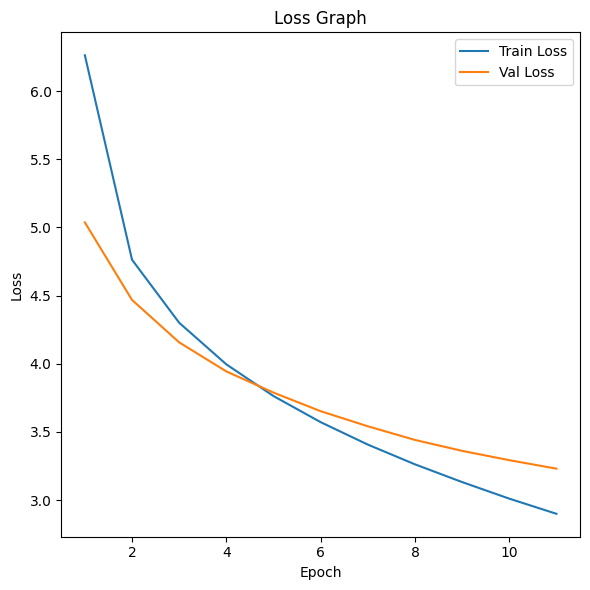

In [ ]:
plt.figure(figsize = (6,6))
plt.plot(range(1, epochs+1), train_losses, label = 'Train Loss')
plt.plot(range(1, epochs+1), val_losses, label = 'Val Loss')
plt.title('Loss Graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

Need more epochs for training but resources have been run out 🥴️😭️😭️😭️😭️😭️

In [ ]:
if best_model_state_dict is not None:
  print(f'Best model found at epoch {best_epoch}')
  torch.save(best_model_state_dict, 'torchModel.pth')
  torch.save(question_vocab, 'questions_vocab.pth')
  torch.save(answers_vocab, 'answers_vocab.pth')
  torch.save(tokn, 'tokenizer.pth')
  print('Model have been saved successfully :)')
else:
  print("no improvemet in val loss. Model not saved :(")

Best model found at epoch 11
Model have been saved successfully :)


## Prediction
Has been applied into Streamlit App